<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/MLP/4-4-Classification_using_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification using embeddings

There are many ways to classify text. This notebook shares an example of text classification using embeddings. For many text classification tasks, we've seen fine-tuned models do better than embeddings. See an example of fine-tuned models for classification in [Fine-tuned_classification.ipynb](Fine-tuned_classification.ipynb). We also recommend having more examples than embedding dimensions, which we don't quite achieve here.

In this text classification task, we predict the score of a food review (1 to 5) based on the embedding of the review's text. We split the dataset into a training and a testing set for all the following tasks, so we can realistically evaluate performance on unseen data. The dataset is created in the [Get_embeddings_from_dataset Notebook](Get_embeddings_from_dataset.ipynb).


In [1]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.5/383.5 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.3 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
import os

userdata.get('OPENAI_API_KEY')
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
api_key = os.getenv("OPENAI_API_KEY")

In [3]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1jfmC2bkgmsjC56xlOeNyrIOytxPMJP6R' -O fine_food_reviews_with_embeddings_1k.csv

--2024-10-03 13:49:43--  https://drive.google.com/uc?export=download&id=1jfmC2bkgmsjC56xlOeNyrIOytxPMJP6R
Resolving drive.google.com (drive.google.com)... 108.177.96.101, 108.177.96.138, 108.177.96.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.96.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1jfmC2bkgmsjC56xlOeNyrIOytxPMJP6R&export=download [following]
--2024-10-03 13:49:43--  https://drive.usercontent.google.com/download?id=1jfmC2bkgmsjC56xlOeNyrIOytxPMJP6R&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.119.132, 2a00:1450:4013:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.119.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35255462 (34M) [application/octet-stream]
Saving to: ‘fine_food_reviews_with_embeddings_1k.csv’

fine_food_reviews_w 100%[===========

In [6]:
import pandas as pd
import numpy as np
from ast import literal_eval

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

datafile_path = "./fine_food_reviews_with_embeddings_1k.csv"

df = pd.read_csv(datafile_path)
df["embedding"] = df.embedding.apply(literal_eval).apply(np.array)  # convert string to array

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    list(df.embedding.values), df.Score, test_size=0.2, random_state=42
)

# train random forest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
probas = clf.predict_proba(X_test)

report = classification_report(y_test, preds)
print(report)


              precision    recall  f1-score   support

           1       0.78      0.35      0.48        20
           2       1.00      0.38      0.55         8
           3       1.00      0.18      0.31        11
           4       1.00      0.26      0.41        27
           5       0.75      1.00      0.86       134

    accuracy                           0.77       200
   macro avg       0.91      0.43      0.52       200
weighted avg       0.81      0.77      0.72       200



We can see that the model has learnt to distinguish between the categories decently. 5-star reviews show the best performance overall, and this is not too surprising, since they are the most common in the dataset.

In [7]:
!mkdir utils

In [8]:
!wget https://raw.githubusercontent.com/openai/openai-cookbook/main/examples/utils/embeddings_utils.py -O utils/embeddings_utils.py

--2024-10-03 13:52:03--  https://raw.githubusercontent.com/openai/openai-cookbook/main/examples/utils/embeddings_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8172 (8.0K) [text/plain]
Saving to: ‘utils/embeddings_utils.py’

utils/embeddings_ut 100%[===================>]   7.98K  --.-KB/s    in 0s      

2024-10-03 13:52:03 (74.0 MB/s) - ‘utils/embeddings_utils.py’ saved [8172/8172]



RandomForestClassifier() - Average precision score over all classes: 0.87


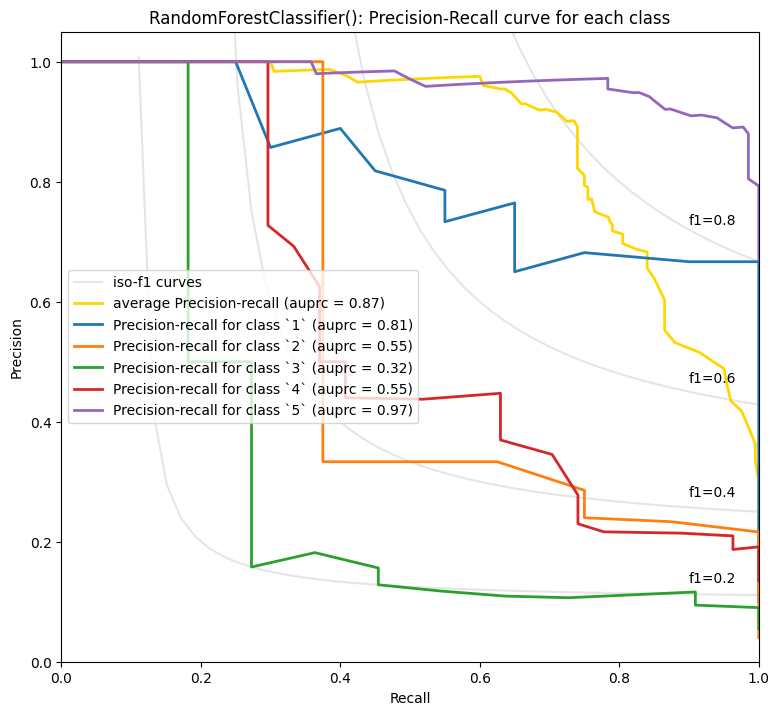

In [9]:
from utils.embeddings_utils import plot_multiclass_precision_recall

plot_multiclass_precision_recall(probas, y_test, [1, 2, 3, 4, 5], clf)

Unsurprisingly 5-star and 1-star reviews seem to be easier to predict. Perhaps with more data, the nuances between 2-4 stars could be better predicted, but there's also probably more subjectivity in how people use the inbetween scores.